In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



# 비지도학습이란?

In [2]:
# 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝을 가르킴
# 비지도 학습에서 학습 알고리즘은 입력 데이터만으로 데이터에서 지식을 추출할 수 있어야함

# 두가지 비지도 학습 존재
    # 1. 데이터의 비지도 변환, unsupervised transformation
    # 2. 데이터의 군집, clustering

## 비지도 변환

In [3]:
# 데이터를 새롭게 표현하여, 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘

# 비지도 변환이 널리 사용되는 분야 :
    # 특성이 많은 고차원 데이터를 특성의 수를 줄이면서, 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소(dimensionaliy reduction)
    # ex) 시각화를 위해 데이터 셋을 2차원으로 변경하는 경우
# 비지도 변환으로 데이터를 구성하는 단위나 성분을 찾기도함
    # ex) 큰 텍스트 문서에서 주제를 추출하는 것
    # 이때, 문서에서 이야기하는 주제들이 무엇인지 찾고 학습하는 것이 처리할 작업

## 군집 알고리즘

In [4]:
# 데이터를 비슷한 것끼리 그룹으로 묶는 것
    # ex) 소셜 미디어 사이트에서 사진을 업로드 할 때, 업로드한 사진을 분류하는 것.. 누구랑 찍었는지 얼마나 많은 사람들과 찍은 사진인지..

## 비지도 학습의 도전과제

In [5]:
# 비지도 학습에서 어려운 일, 알고리즘이 뭔가 유용한 것을 학습했는지 평가하는 것
# 보통 레이블이 없는 데이터에 적용하기 때문에, 무엇이 올바른 출력인지 모름, 모델이 일을 잘 하고 있는지 모름
    # 보통 결과를 평가하기 위해선 직접 결과를 확인 대조하는 것이 유일한 방법일 경우 다수

# 데이터 사이언티스트가 데이터를 더 잘 이해하고 싶을 때, 탐색적 분석 단계에서 많이 사용함
# 비지도 학습은 지도 학습의 전처리 단계에서도 사용
    # 비지도 학습의 결과로 표현된 데이터롤 사용하여 학습하면, 지도 학습 정확도가 좋아지기도 하며, 메모리와 시간 절약 가능

### 간단한 전처리 메소드(지도학습을 위한)

In [6]:
# 지도학습에서 전처리와 스테일 조정을 자주 사용, 그러나 스케일 조정 메서드는 지도 정보를 사용하지 않으므로 비지도 방식으로 볼 수 있음

### 데이터 전처리와 스케일 조정

In [7]:
# 지도학습의 SVM or 신경망의 경우 데이터의 스케일에 매우 민감함
# 그러므로 이런 알고리즘들에 맞게 데이터의 특성값을 조절함
# 보통 특성마다 스케일을 조정해서 데이털르 변경함

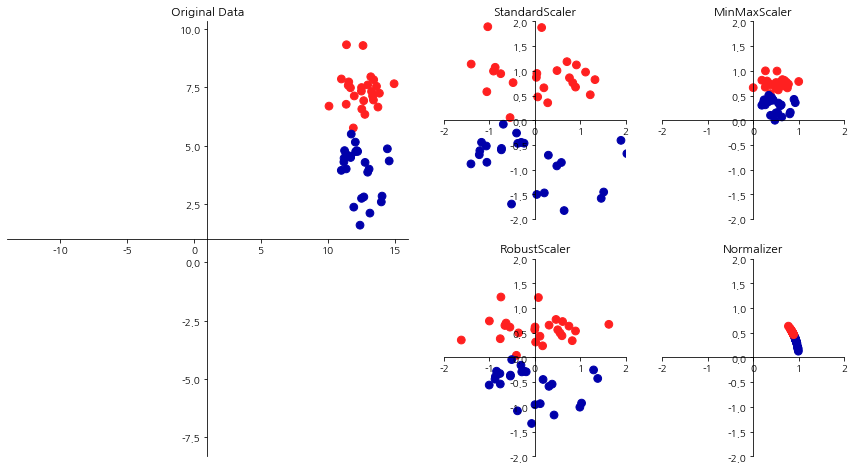

In [8]:
mglearn.plots.plot_scaling()

In [9]:
# (좌) 두개의 특성을 인위적으로 만든 이진 분류 데이터
    # 첫번째 특성(x축의 값) : 10 - 15 사이에 존재
    # 두번째 특성(y축의 값) : 0 - 10.0 사이에 존재
# (우) 데이터를 기준이 되는 범위로 변환하는 4가지 방법
    # 1. StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경
        # x - (평균) / 표준편차 ___z-점수or표준점수
        # 이 방법은 특성의 최대, 최소 값을 제한하진 않음
    # 2. RobustScaler : 특성들이 같은 스케일을 갖게된다는 통계적 측면에서는 StandardScaler 와는 비슷
        # 그러나, 평균과 분산 대신 중간값(median)과 사분위 값(quartile)사용
        # 중간값 : x보다 작은 수가 절반, x보다 큰수가 절반
        # 사분위값 : 1사분위, x보다 작은 수가 전체 개수의 1/4 _ 3사분위, x보다 작은 수가 전체 개수의 3/4 ...
        # 식 : ( x - 중간값 ) / ( 1사분위 - 3사분위 )
    # 3. MinMaxScaler : 각 값을 정확하게 0과 1사이에 위치하도록 변경
        # 식 : ( x - 최소값 ) / ( 최대값 - 최소값 == 전체범위 )
        # 2차원 데이터셋의 경우 모든 데이터가 x,y 축 0-1,0-1 범위에 담기게됨
    # 4. Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정
        # 노름 매개변수는 L1, L2, MAX 지원
        # 유클리디안을 가르키는 L2가 기본 매개변수
        # 1,2,3 방법의 경우는 각 열(특성)의 통계치를 이용, Normalizer는 행(데이터 포인트)마다 각기 정규화됨
        # 지름이 1인 원(3차원인 경우 구)에 데이터를 투영함
        # == 각 데이터 포인트가 다른 비율로(길이에 반비례) 스케일 조정
        # 이러한 정규화는 특성 벡터의 길이는 상관이 없고, 데이터의 방향(or 각도)이 중요할 때 많이 사용

### 데이터 변환 적용하기

In [10]:
# cancer dataset 사용, 커널SVM(SVC), MinMaxScaler
# 스케일을 조정하는 전처리 메서드는 보통 지도 학습 알고리즘을 적용하기 전에 적용함

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)

print(X_train.shape)
print(X_test.shape)


(426, 30)
(143, 30)


In [12]:
scaler = MinMaxScaler()
# fit 메서드에 훈련데이터를 적용
# MinMaxScaler 의 fit 메서드는 훈련 세트에 있는 특성마다 최솟값과 최댓값을 계산함
# 회귀 모델과는 달리, 스케일 객체는 fit 메서드를 호출할때, 훈련데이터(X_train) 만을 넘겨주며, y_train은 사용하지 않음(라벨)
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
# fit 메서드로 학습한 변환을 사용하려면 .transform 사용, transform은 새로운 데이터 표현을 만들 떄 사용하는 메서드
X_train_scaled = scaler.transform(X_train)

# 스케일이 좆어된 후 데이터셋의 속성을 출력
print('변환된 후 크기 : ', X_train_scaled.shape)
print('스케일 조정 전 특성별 최소값:\n', X_train.min(axis=0))
print('스케일 조정 전 특성별 최대값:\n', X_train.max(axis=0))
print('스케일 조정 후 특성별 최소값:\n', X_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값:\n', X_train_scaled.max(axis=0))

변환된 후 크기 :  (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
# 배열 크기는 스케일 조정 전과 후가 같음, 그 안의 값이 이동하거나, 값의 크기가 조정되었을 뿐
# SVM(SVC)에 적용하기 위해서, 테스트 세트도 변환
X_test_scaled = scaler.transform(X_test)
print('스케일 조정 후 특성별 최소값:\n', X_test_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값:\n', X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [15]:
# 테스트 세트의 스케일은 0-1 범위를 벗어나는데, 훈련 세트를 이용해 fit했기 때문이다

### QuantileTransformer

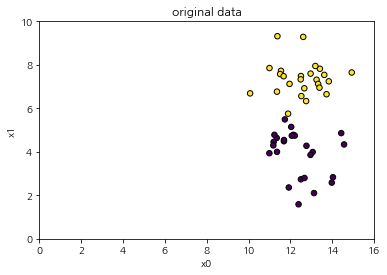

In [16]:
# QuantileTransformer는 1000개의 분위(quantile)을 사용, 데이터를 균등하게 분포시킴
# RobustScaler(사분위)와 같이 이상치에 둔감, 전체 데이터를 0과 1사이로 압축
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X+=3
# 산점도
plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.xlabel('x0')
plt.ylim(0,10)
plt.ylabel('x1')
plt.title('original data')
plt.show()

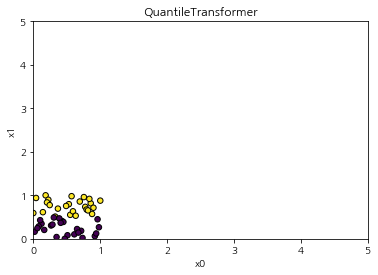

In [17]:
# QuantileTransformer 적용 스케일 변환 확인
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,5)
plt.xlabel('x0')
plt.ylim(0,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

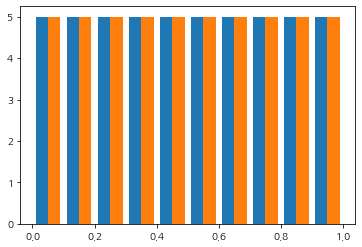

In [18]:
# 변환된 데이터들의 히스토그램
plt.hist(X_trans)
plt.show()
# 균등분포 되어있음

In [19]:
# QuantileTransformer 의 분위 수는 n_quantiles 매개변수 설정 가능, 기본값 1000
# scaler 객체의 quantiles_ 속성에는 특성별로 계산된 분위값이 들어가있음, shape.(n_quantiles, n_features)
print(scaler.quantiles_.shape)

print(scaler.n_quantiles_, scaler.set_params)
# n_quantiles 은 1000 이나, 현재 들어가는 데이터의 갯수가 50개 이므로 50, 2가 됨, 데이터 갯수를 5000으로 늘리면 1000으로 찍히는걸 확인

(50, 2)
50 <bound method BaseEstimator.set_params of QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)>


In [28]:
# QuantileTransformer 의 동작을 이해하기 위해 샘플 데이터 만들어서 적용
x = np.array([[0], [5], [8], [9], [10], [0], [5], [8], [9], [10], [0], [5], [8], [9], [10]])

# np.percentile() 함수는 두번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환함
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

# 1번쨰, 1사분위, 중간값, 3사분위, 마지막값 지정

[ 0.  5.  8.  9. 10.]


In [29]:
x_trans = QuantileTransformer().fit_transform(x)

In [30]:
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.         0.28571429 0.5        0.71428571 1.        ]


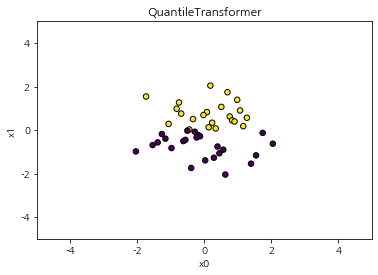

In [34]:
# QuantileTransformer 는 output_distribution 매개변수에서 normal로 지정하여, 균등 분포가 아니라, 정규 분포로 출력을 바꿀 수도 있음

scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:,0], X_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(-5,5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

In [35]:
# sklean 0.20 버전부터 데이터의 특성 별로, 정규분포 형태에 가까도록 변환해주는 PowerTransformer가 추가됨
# method 매개변수에 'yeo-johnson', 'box-cox' 알고리즘 지정가능, 'yeo-johnson' 이 Default

### QuantileTransformer, StrandardScaler, PowerTransformer(yeo-johnson, box-cox) 차이

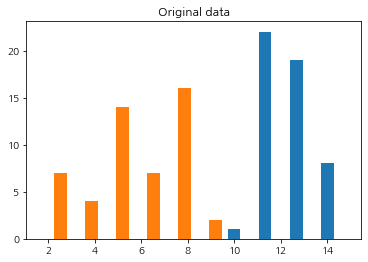

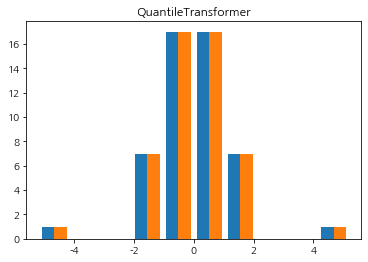

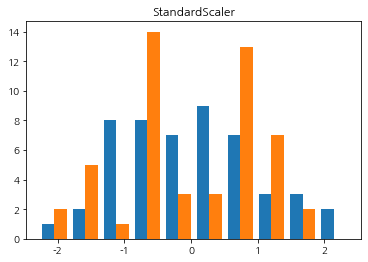

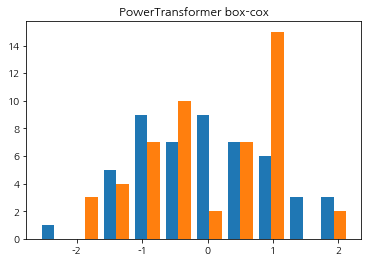

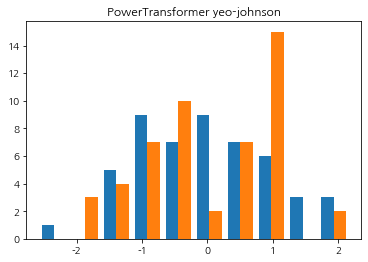

In [36]:
plt.hist(X)
plt.title('Original data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer().fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()




In [37]:
# PowerTransformer 의 두 알고리즘이 동일한 히스토그램을 그림
# 실전에서는 데이터셋을 변환 시킬때, 어떤 변환이 더 정규분포에 가깝게 변환시킬지 확인하기 위해서
# 히스토그램을 그려보는 것이 좋음

## 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

In [38]:
# 지도학습 모델에서 테스트 세트를 사용하려면 훈련 세트와 테스트 세트에 같은 변환을 적용해야 한다는 점이 중요함

# 테스트의 세트의 최솟값과 범위를 사용하면 어떤 일이 일어나는지 알 수 있음

Text(0.5, 1.0, 'MinMaxScaler 잘못 조정된 데이터')

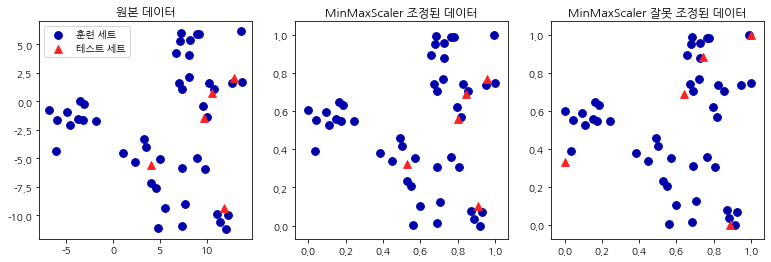

In [47]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size = .1)

fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2.colors[0], label='훈련 세트', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=mglearn.cm2.colors[1], marker='^', label='테스트 세트', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('원본 데이터')

# MinMaxScaler 이용 스케일 조정
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='훈련 세트', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=mglearn.cm2.colors[1], marker='^', label='테스트 세트', s=60)
axes[1].set_title('MinMaxScaler 조정된 데이터')

# 테스트 세트의 스케일 따로 조정
# 테스트 세트의 최솟값은 0, 최댓값은 1, 예제를 위한 것 -> 틀린 방법
test_scaler = MinMaxScaler().fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='훈련 세트', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], c=mglearn.cm2.colors[1], marker='^', label='테스트 세트', s=60)
axes[2].set_title('MinMaxScaler 잘못 조정된 데이터')


In [48]:
# 원본데이터와 MinMaxScaler 를 올바르게 적용한 데이터는 데이터의 값의 범위가 달라졌을 뿐, 모형이 같으나
# test 데이터를 따로 적용해서 스케일링한 데이터는 전체적인 모양이 흐트러짐 잘못된 경우임

## 지도 학습에서 데이터 전처리 효과

In [49]:
# cancer dataset에서 SVC를 학습시킬 때, MinMaxScaler 의 효과를 확인해보겠음

In [67]:
# 원본데이터로 SVC
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100, gamma='auto').fit(X_train, y_train)
svm_default = SVC().fit(X_train, y_train)
# gamma는 default가 scale < 사용하면 꽤 높은 스코어가 나오긴함
print('테스트 세트 정확도 : {:.2f}'.format(svm.score(X_test, y_test)))
print('default test set scores : {:.2f}'.format(svm_default.score(X_test, y_test)))

테스트 세트 정확도 : 0.63
default test set scores : 0.94


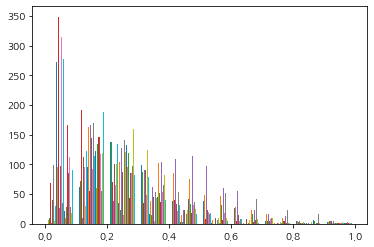


scaler's name :  MinMaxScaler(copy=True, feature_range=(0, 1))
테스트 세트 정확도 : 0.97
default test set scores : 0.97



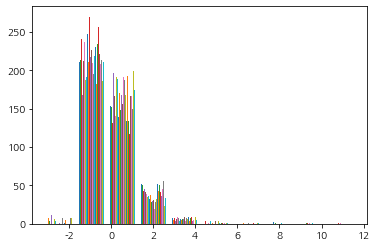


scaler's name :  StandardScaler(copy=True, with_mean=True, with_std=True)
테스트 세트 정확도 : 0.96
default test set scores : 0.97



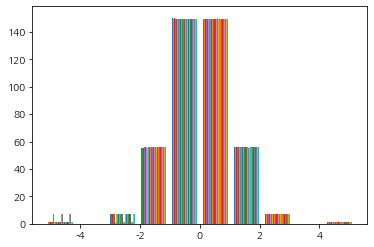


scaler's name :  QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='normal', random_state=None,
                    subsample=100000)
테스트 세트 정확도 : 0.97
default test set scores : 0.97



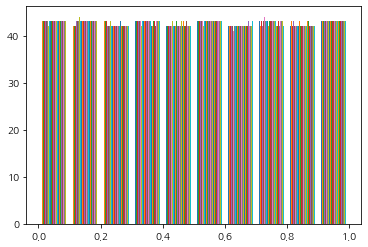


scaler's name :  QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=1000,
                    output_distribution='uniform', random_state=None,
                    subsample=100000)
테스트 세트 정확도 : 0.95
default test set scores : 0.97



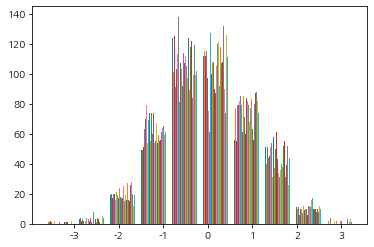


scaler's name :  PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
테스트 세트 정확도 : 0.98
default test set scores : 0.99



In [115]:
# MinMaxscaler, StandardScaler, QuantileTransformer_정규분포, QuantileTransformer_균등분포
# 
# PowerTransformer_yeo-johnson, _box-cox
scaler_set = [
    MinMaxScaler(), StandardScaler(), QuantileTransformer(output_distribution='normal'),
    QuantileTransformer(), PowerTransformer()
]
for scalers in scaler_set:
    scaler = scalers.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    plt.hist(X_train_scaled)
    plt.show()
    svm.fit(X_train_scaled, y_train)
    svm_default.fit(X_train_scaled, y_train)
    print('\nscaler\'s name : ', scalers)
    print('테스트 세트 정확도 : {:.2f}'.format(svm.score(X_test_scaled, y_test)))
    print('default test set scores : {:.2f}\n'.format(svm_default.score(X_test_scaled, y_test)))

In [93]:
# 정규 분포를 따르도록 데이터를 변환하고 이후 분석에서 사용할 수 있도록 변환된 데이터를 저장하려면 Box-Cox 변환을 사용
# Box-Cox 변환은 양수 데이터와 함께만 사용할 수 있음, 데이터에 음수 값이나 0이 포함되어 있는 경우에는 Johnson 변환을 사용
# PowerTransformer 의 경우의 점수가 가장 높았음